### KHAI BÁO THƯ VIỆN

In [57]:
import pandas as pd
import numpy as np
from pykalman import KalmanFilter
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('Gia SMP va SMPcap 2021(Giá thị trường SMP).csv', encoding='latin-1', sep=';')
df


,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,...,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6


In [59]:
feats = ['11','12','13']

In [60]:
selected_data = df[feats]
selected_data.head(5)

,11,12,13
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1010.8,1010.8,1010.8
4,1061.5,1061.5,1061.5


### EDA

In [61]:
# Kiểm tra dữ liệu
selected_data.isnull().sum()

11    0
12    0
13    0
dtype: int64

In [62]:
selected_data.describe()

,11,12,13
count,365.000000,365.000000,365.000000
mean,1040.311233,1040.311507,1040.312329
std,105.147265,105.147065,105.146765
min,885.700000,885.700000,885.700000
25%,988.400000,988.400000,988.400000
50%,1022.600000,1022.600000,1022.600000
75%,1061.500000,1061.500000,1061.500000
max,1565.500000,1565.500000,1565.500000


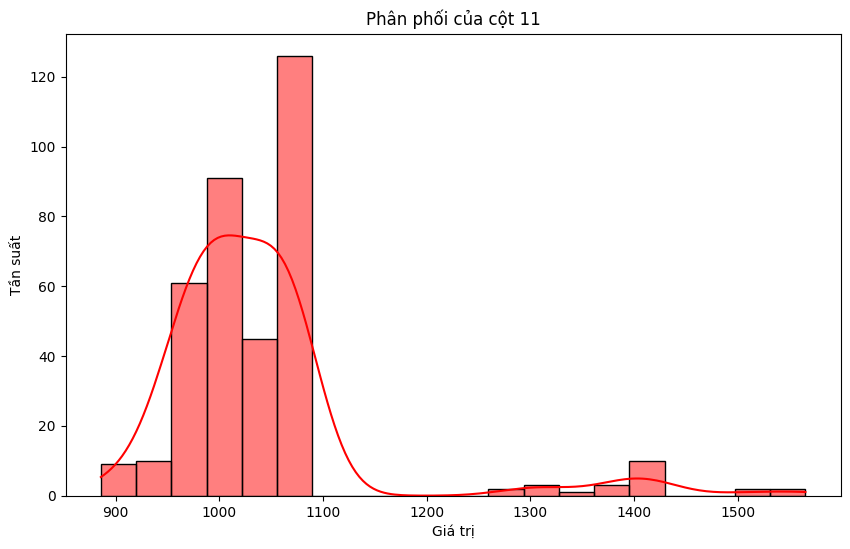

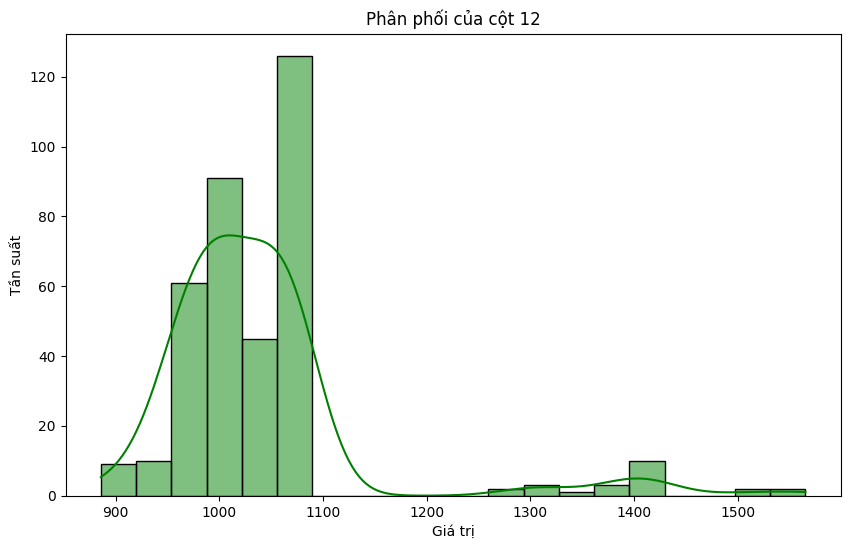

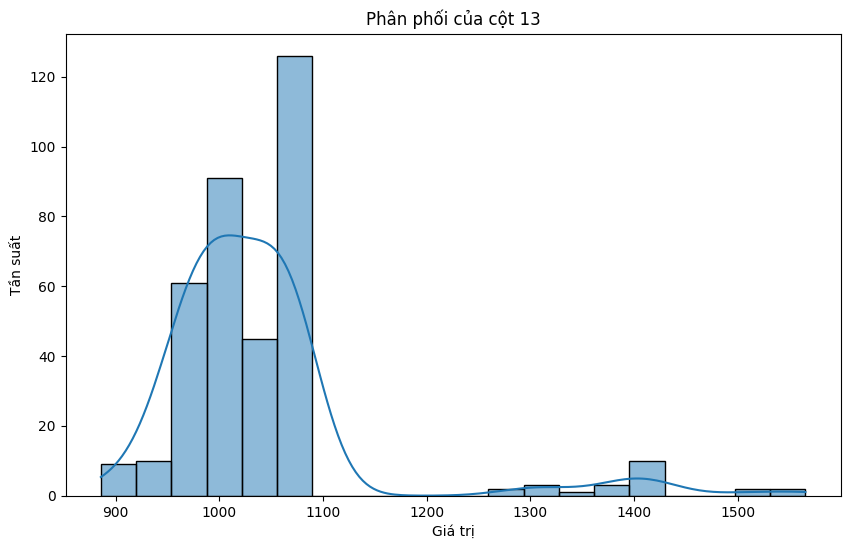

In [63]:
# Phân phối dữ liệu
plt.figure(figsize=(10, 6))
sns.histplot(selected_data['11'], bins=20, kde=True, color='red')
plt.title('Phân phối của cột 11')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()

# Phân phối dữ liệu
plt.figure(figsize=(10, 6))
sns.histplot(selected_data['12'], bins=20, kde=True, color='green')
plt.title('Phân phối của cột 12')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()

# Phân phối dữ liệu
plt.figure(figsize=(10, 6))
sns.histplot(selected_data['13'], bins=20, kde=True)
plt.title('Phân phối của cột 13')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()

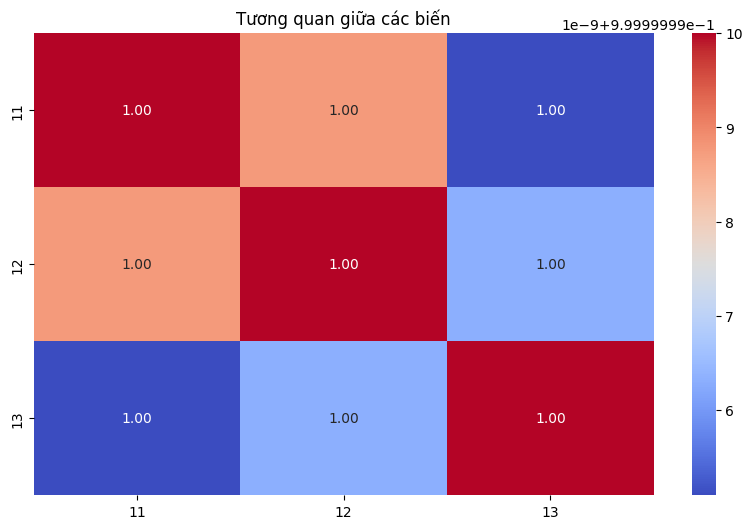

In [64]:
# Tương quan giữa các biến
plt.figure(figsize=(10, 6))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Tương quan giữa các biến')
plt.show()

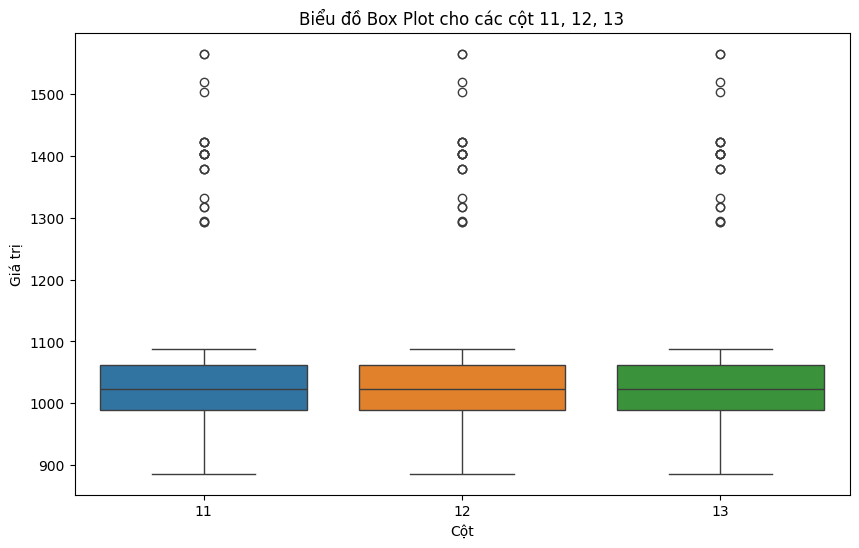

In [65]:
# Vẽ biểu đồ box plot
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ
sns.boxplot(data=selected_data)  # Vẽ box plot
plt.title('Biểu đồ Box Plot cho các cột 11, 12, 13')  # Tiêu đề của biểu đồ
plt.xlabel('Cột')  # Nhãn trục x
plt.ylabel('Giá trị')  # Nhãn trục y
plt.show()  # Hiển thị biểu đồ

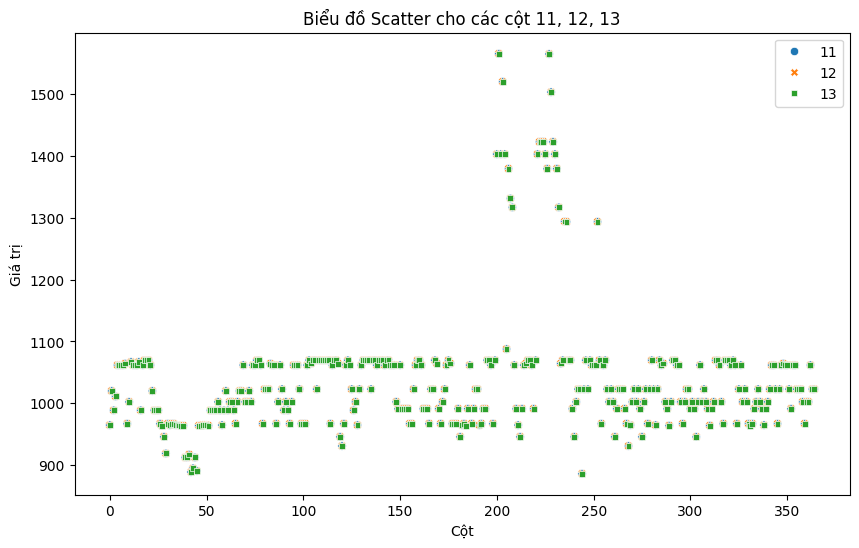

In [66]:
# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ
sns.scatterplot(data=selected_data)  # Vẽ box plot
plt.title('Biểu đồ Scatter cho các cột 11, 12, 13')  # Tiêu đề của biểu đồ
plt.xlabel('Cột')  # Nhãn trục x
plt.ylabel('Giá trị')  # Nhãn trục y
plt.show()  # Hiển thị biểu đồ

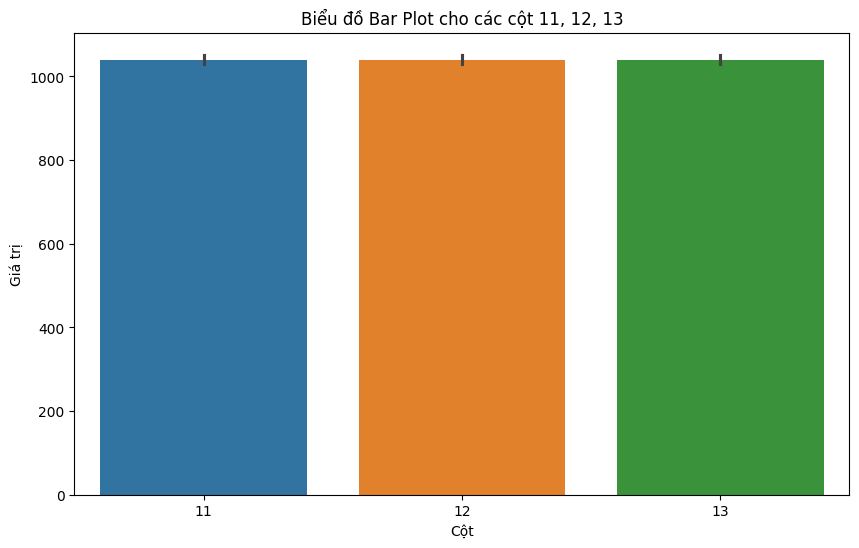

In [67]:
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ
sns.barplot(data=selected_data)  # Vẽ box plot
plt.title('Biểu đồ Bar Plot cho các cột 11, 12, 13')  # Tiêu đề của biểu đồ
plt.xlabel('Cột')  # Nhãn trục x
plt.ylabel('Giá trị')  # Nhãn trục y
plt.show()  # Hiển thị biểu đồ

### KALMAN

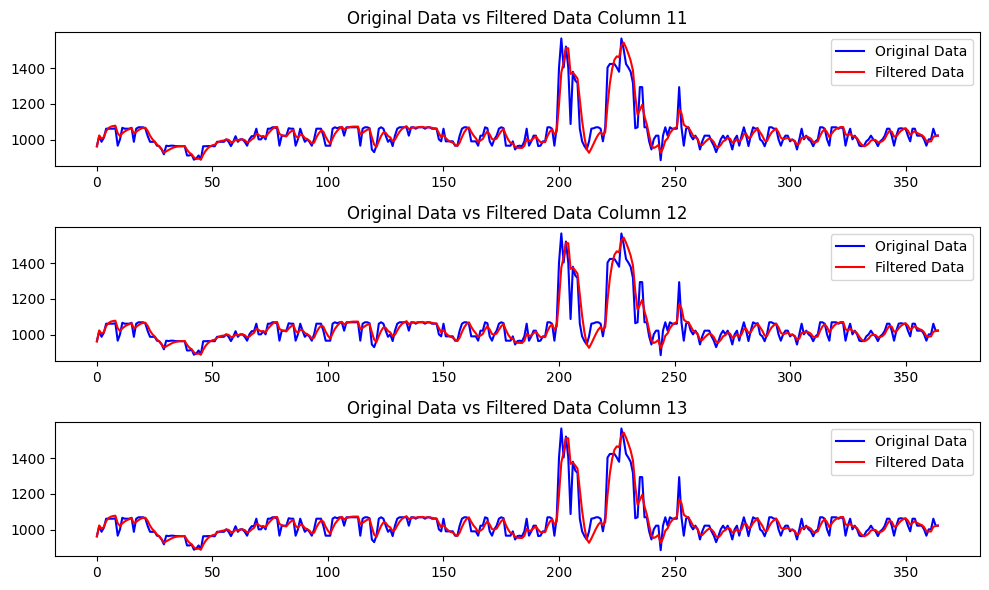

In [68]:
from filterpy.kalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Function to apply Kalman Filter
def apply_kalman_filter(data):
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([0., 0.])      
    kf.F = np.array([[1., 1.], [0., 1.]]) 
    kf.H = np.array([[1., 0.]])     
    kf.P *= 1000.                   
    kf.R = 5                       
    kf.Q = np.array([[0.1, 0.1], [0.1, 0.1]]) 

    filtered_data = []
    for z in data:
        kf.predict()
        kf.update(z)
        filtered_data.append(kf.x[0])
    return filtered_data

# Apply Kalman Filter to each column
filtered_data_11 = apply_kalman_filter(selected_data['11'].values)
filtered_data_12 = apply_kalman_filter(selected_data['12'].values)
filtered_data_13 = apply_kalman_filter(selected_data['13'].values)

# Visualize
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(selected_data['11'], color='blue', label='Original Data')
plt.plot(filtered_data_11, color='red', label='Filtered Data')
plt.title('Original Data vs Filtered Data Column 11')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(selected_data['12'], color='blue', label='Original Data')
plt.plot(filtered_data_12, color='red', label='Filtered Data')
plt.title('Original Data vs Filtered Data Column 12')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(selected_data['13'], color='blue', label='Original Data')
plt.plot(filtered_data_13, color='red', label='Filtered Data')
plt.title('Original Data vs Filtered Data Column 13')
plt.legend()

plt.tight_layout()
plt.show()


In [69]:
from statsmodels.tsa.stattools import adfuller

# Hàm dự đoán sử dụng ADF Statistic và p-value
def predict_stationarity(data):
    result = adfuller(data)
    adf_statistic = result[0]
    p_value = result[1]
    
    if p_value > 0.05:
        return "Không stationary"
    else:
        return "Stationary"

# Dự đoán cho cột 11
prediction_11 = predict_stationarity(selected_data['11'].values)
print("Dự đoán cho cột 11:", prediction_11)

# Dự đoán cho cột 12
prediction_12 = predict_stationarity(selected_data['12'].values)
print("Dự đoán cho cột 12:", prediction_12)

# Dự đoán cho cột 13
prediction_13 = predict_stationarity(selected_data['13'].values)
print("Dự đoán cho cột 13:", prediction_13)


Dự đoán cho cột 11: Không stationary
Dự đoán cho cột 12: Không stationary
Dự đoán cho cột 13: Không stationary


### Kmeans

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


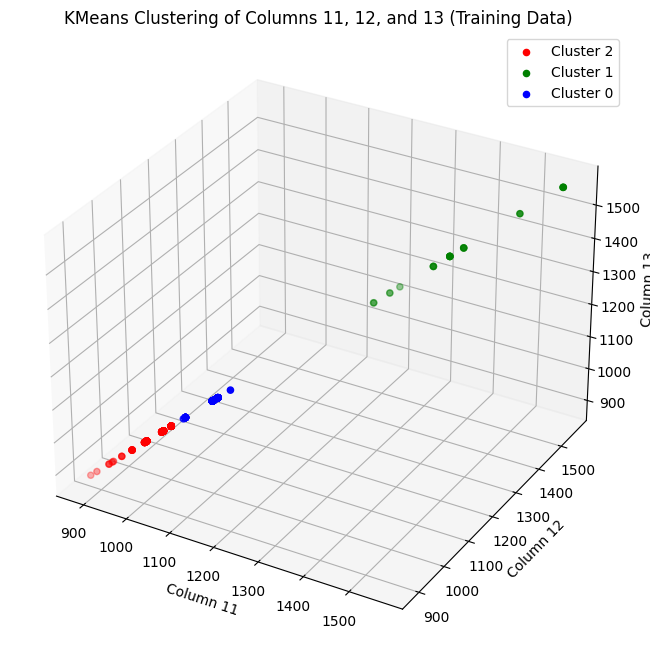

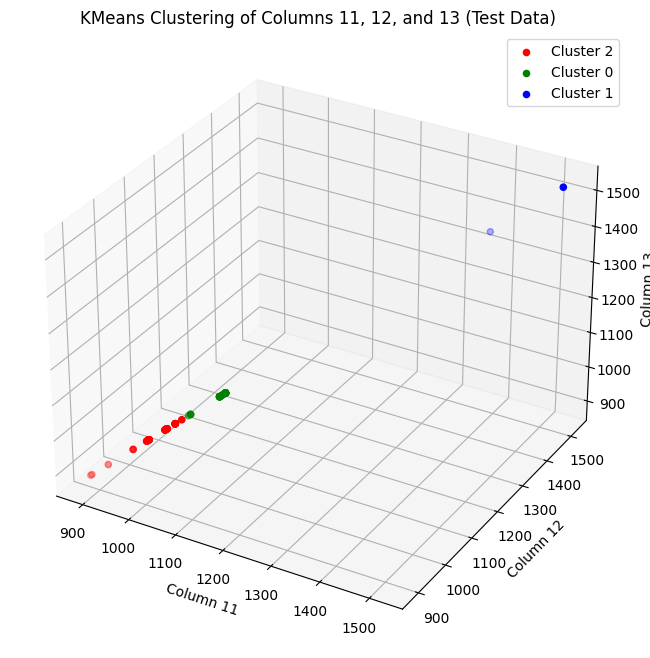

In [72]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(selected_data[['11', '12', '13']], selected_data['Cluster'], test_size=0.2, random_state=42)

# Tạo một đối tượng KMeans với số cụm mong muốn
kmeans = KMeans(n_clusters=3)

# Phân nhóm dữ liệu huấn luyện
clusters_train = kmeans.fit_predict(X_train)

# Thêm cột 'Cluster' vào tập dữ liệu huấn luyện để lưu trữ nhóm của mỗi điểm dữ liệu
X_train['Cluster'] = clusters_train

# Vẽ biểu đồ 3D của các nhóm trên tập huấn luyện
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for cluster, color in zip(X_train['Cluster'].unique(), colors):
    cluster_data = X_train[X_train['Cluster'] == cluster]
    ax.scatter(cluster_data['11'], cluster_data['12'], cluster_data['13'], c=color, label=f'Cluster {cluster}')

ax.set_xlabel('Column 11')
ax.set_ylabel('Column 12')
ax.set_zlabel('Column 13')
ax.set_title('KMeans Clustering of Columns 11, 12, and 13 (Training Data)')
ax.legend()
plt.show()

# Phân nhóm dữ liệu kiểm tra
clusters_test = kmeans.predict(X_test)

# Thêm cột 'Cluster' vào tập dữ liệu kiểm tra để lưu trữ nhóm của mỗi điểm dữ liệu
X_test['Cluster'] = clusters_test

# Vẽ biểu đồ 3D của các nhóm trên tập kiểm tra
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for cluster, color in zip(X_test['Cluster'].unique(), colors):
    cluster_data = X_test[X_test['Cluster'] == cluster]
    ax.scatter(cluster_data['11'], cluster_data['12'], cluster_data['13'], c=color, label=f'Cluster {cluster}')

ax.set_xlabel('Column 11')
ax.set_ylabel('Column 12')
ax.set_zlabel('Column 13')
ax.set_title('KMeans Clustering of Columns 11, 12, and 13 (Test Data)')
ax.legend()
plt.show()
